# Investigating Gender Income Equality in Recent College Graduates 

This section analyzed gender difference in median income for different majors among recent college graduates.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collegetools import gendertool as gt

In [2]:
# Load recent_grads data from 2010 to 2018
recent_grads_10 = pd.read_csv("data/pums/processed/2010_recent_grad_stats_by_major.csv")
recent_grads_12 = pd.read_csv("data/pums/processed/2012_recent_grad_stats_by_major.csv")
recent_grads_14 = pd.read_csv("data/pums/processed/2014_recent_grad_stats_by_major.csv")
recent_grads_16 = pd.read_csv("data/pums/processed/2016_recent_grad_stats_by_major.csv")
recent_grads_18 = pd.read_csv("data/pums/processed/2018_recent_grad_stats_by_major.csv")

women_stem = pd.read_csv("data/fivethiryeight/women-stem.csv")

In [6]:
# Make a list of dataframes
recent_grads_raw = [recent_grads_10, recent_grads_12, recent_grads_14, recent_grads_16, recent_grads_18]

In [7]:
# Drop rows with N/A
recent_grads = [df[(df[['women median','men median']] > 0).all(axis=1)] for df in recent_grads_raw]

### Plotting the Overall Women and Men Income Across Time

In [10]:
# Calculate average median income of all majors respectively for women and men
women_avg_income = [np.mean(df['women median']) for df in recent_grads]
men_avg_income = [np.mean(df['men median']) for df in recent_grads]

Text(0.5, 1.0, 'Mean of median income for women and men recent graduates with all majors')

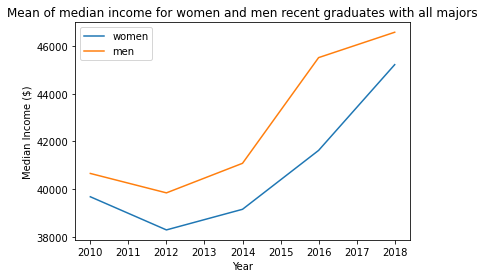

In [11]:
# Make a line plot showing the trend of averge income for women and men from 2010 to 2018
year = [2010, 2012, 2014, 2016, 2018]
plt.plot(year, women_avg_income, label = "women")
plt.plot(year, men_avg_income, label = "men")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Median Income ($)')
plt.title("Mean of median income for women and men recent graduates with all majors")

This plot shows the average of median income for each major respectively for men and women. The income gap had persisted from 2010 to 2018, and expanded from 2010 to 2016, even though income of both groups have increased. 

## Majors with Greatest Gender Income Differences

In [12]:
# Calculate how median income of each major of men exceed that of women of each year.

for df in recent_grads:
    df['median income diff (men - women)'] = df['men median'] - df['women median']

/tmp/ipykernel_983/2445253670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['median income diff (men - women)'] = df['men median'] - df['women median']


In [ ]:
# Plot a horizonal bar plot to see the differences in 2010.
# This function is included in the gendertool.py package 

# def plot_gender_income_diff(year, recent_grads):
    
#     index = int((year - 2010) / 2)
#     # Sort majors by median income differences
#     sorted_grads_diff = [df.sort_values("median income diff (men - women)") for df in recent_grads]
    
#     major = sorted_grads_diff[index]['Major']
#     income_diff = sorted_grads_diff[index]['median income diff (men - women)']
    
#     plt.figure(figsize=(5,40))
#     plt.barh(major, income_diff)
#     plt.title("Median Income Differences between Men and Women (Men - Women) in All Majors")
#     return sorted_grads_diff

[      FOD1P  total   men  women  total median  women median  men median  \
 65   2504.0   4745  4470    275         35259         92000       35000   
 85   3607.0   1940   251   1689         54285         83881       40000   
 111  5008.0   4509  3464   1045         46828         71002       40768   
 44   2404.0  11327  6759   4568         40126         55839       30599   
 123  5402.0   5150  2280   2870         49591         67000       45000   
 ..      ...    ...   ...    ...           ...           ...         ...   
 124  5403.0   7817   883   6934         32207         30189       59535   
 49   2409.0   4123  3300    823         64711         33556       65000   
 97   4005.0    618   563     55         75356         41500       75592   
 146  6099.0   2645  1575   1070         47685         25867       63829   
 4    1104.0   3481  1427   2054         27272          9333       54918   
 
                                            Major  \
 65   MECHANICAL ENGINEERING RELA

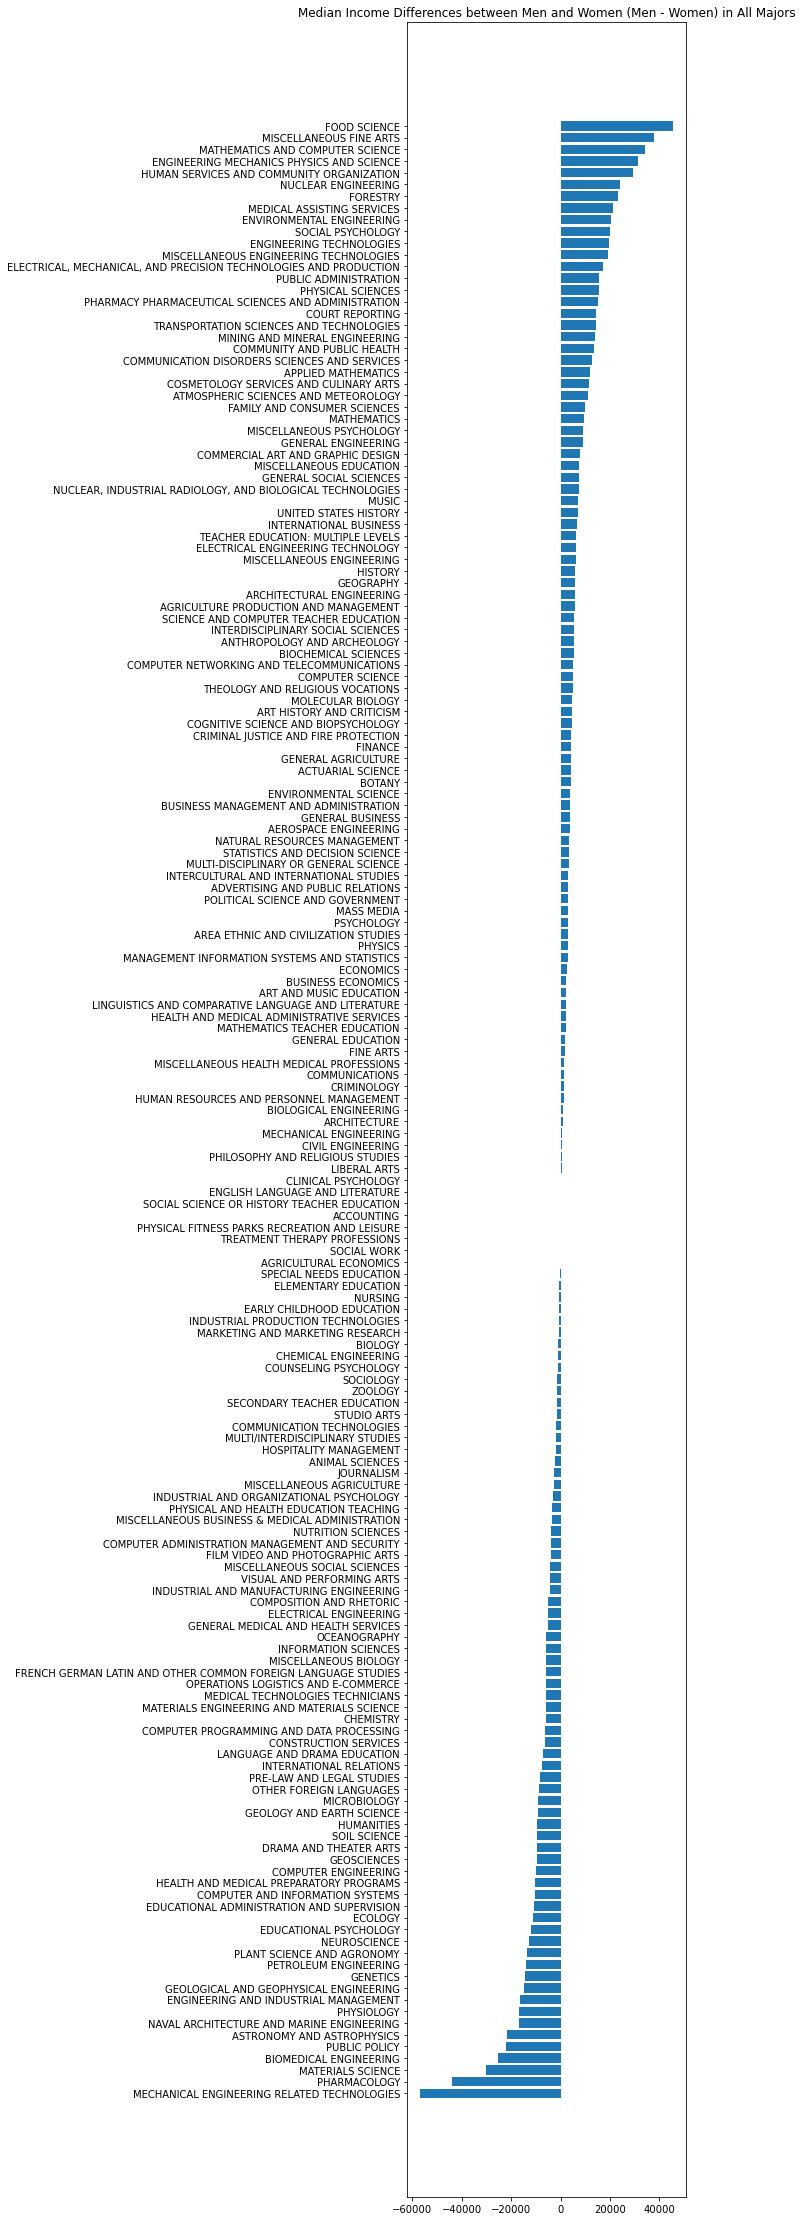

In [24]:
gt.plot_gender_income_diff(2010, recent_grads)

This plot shows the median income gap (men - women) for all majors in the given year. Mechanical engineering related technologies, pharmacology, and materials science are majors with women income significantly greater than men; while food science, miscellaneous fine arts, and mathematics and computer science are the ones with men income significant greater than women. Clinical psychology, English language and literature, accounting are some of those majors with smallest gender gap in income. 

## How do majors with greatest gender income gap change over time

In [ ]:
major_unequal = ['']

## Correlation Heatmap

In [ ]:
# Add a column of "ShareWomen" to all dataframes, recording women ratio in all graduates.
dfs = [recent_grads_10, recent_grads_12, recent_grads_14, recent_grads_16, recent_grads_18]
for df in dfs:
    df['women_ratio'] = df['women'] / (df['men'] + df['women'])

In [ ]:
recent_grads_10.columns

In [ ]:
heatmap_col = recent_grads_10[['total', 'men', 'women', 'total median', 'women median',
       'men median', 'Major', 'Major_Category', 'women_ratio']]

In [ ]:
# Plot a heatmap showing the correlations between each columns
sns.heatmap(heatmap_col.corr(), cmap='BrBG', annot = True)

## Gender ratio and Median Earning

In [ ]:
def womenratio_median_scatter_plot(df, year):
    plt.scatter(df['women_ratio'], df['total median'])
    sns.regplot('women_ratio', 'total median', data=df)
    corr = df['women_ratio'].corr(df['total median'])
    print("correlation coefficient between women ratio and median earning in", year, "equals to:", corr)
    return corr

In [ ]:
womenratio_median_scatter_plot(recent_grads_10, 2010)
womenratio_median_scatter_plot(recent_grads_18, 2018)

In [ ]:
recent_grads.sort_values('Median')[['Major', 'ShareWomen', 'Median']].head(10)

## Majors with greatest earning differences

In [ ]:
recent_grads['Diff_P75_P25'] = recent_grads['P75th'] - recent_grads['P25th']

In [ ]:
recent_grads.sort_values('Diff_P75_P25', ascending = False).head(5)

## Majors with highest unemployment rate

In [ ]:
recent_grads.sort_values('Unemployment_rate', ascending = False).head(10)